# **Data Collection Notebook**

## Objectives

* Fetch data from Kaggle and save as raw data
* Inspect the data and save under outputs/datasets/collection

## Inputs

*   Kaggle JSON file - authentication token 

## Outputs

* Generate Dataset: outputs/datasets/collection/TelcoCustomerChurn.csv

## Additional Comments


* In the workplace **projects are not done using Kaggle data**, but instead the data comes from multiple data sources that may be hosted internally ( like in a data warehouse) or outside your company. For fir this project learning context, we are fetching the data from Kaggle.

* Another aspect is that in the workplace, the **data has never to be pushed to a public repository** due to security reasons. Just for this project learning context we are hosting the data in a public repo.


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'/workspace/churnometer/jupyter_notebooks'

We want to make the parent of current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'/workspace/churnometer'

# Fetch data from Kaggle

Install kaggle to fetch data

In [4]:
! pip install kaggle==1.5.12

     |████████████████████████████████| 58 kB 6.9 MB/s 
     |████████████████████████████████| 78 kB 9.8 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=77384051f3d3543494fb38830dd795d150f98cf4606f45b86ef90296d711c1ab
  Stored in directory: /home/gitpod/.cache/pip/wheels/29/da/11/144cc25aebdaeb4931b231e25fd34b394e6a5725cbb2f50106
Successfully built kaggle
You should consider upgrading via the '/home/gitpod/.pyenv/versions/3.8.12/bin/python3 -m pip install --upgrade pip' command.


In Data Collection Section we studied how to download  **json file (authentication token)** from Kaggle. That is needed to authenticate kaggle to download data in this session.
* You will need **kaggle.json** available
* In case you don't have it, please revert to Data Collection section


Next step is to drag manually kaggle.json to the session

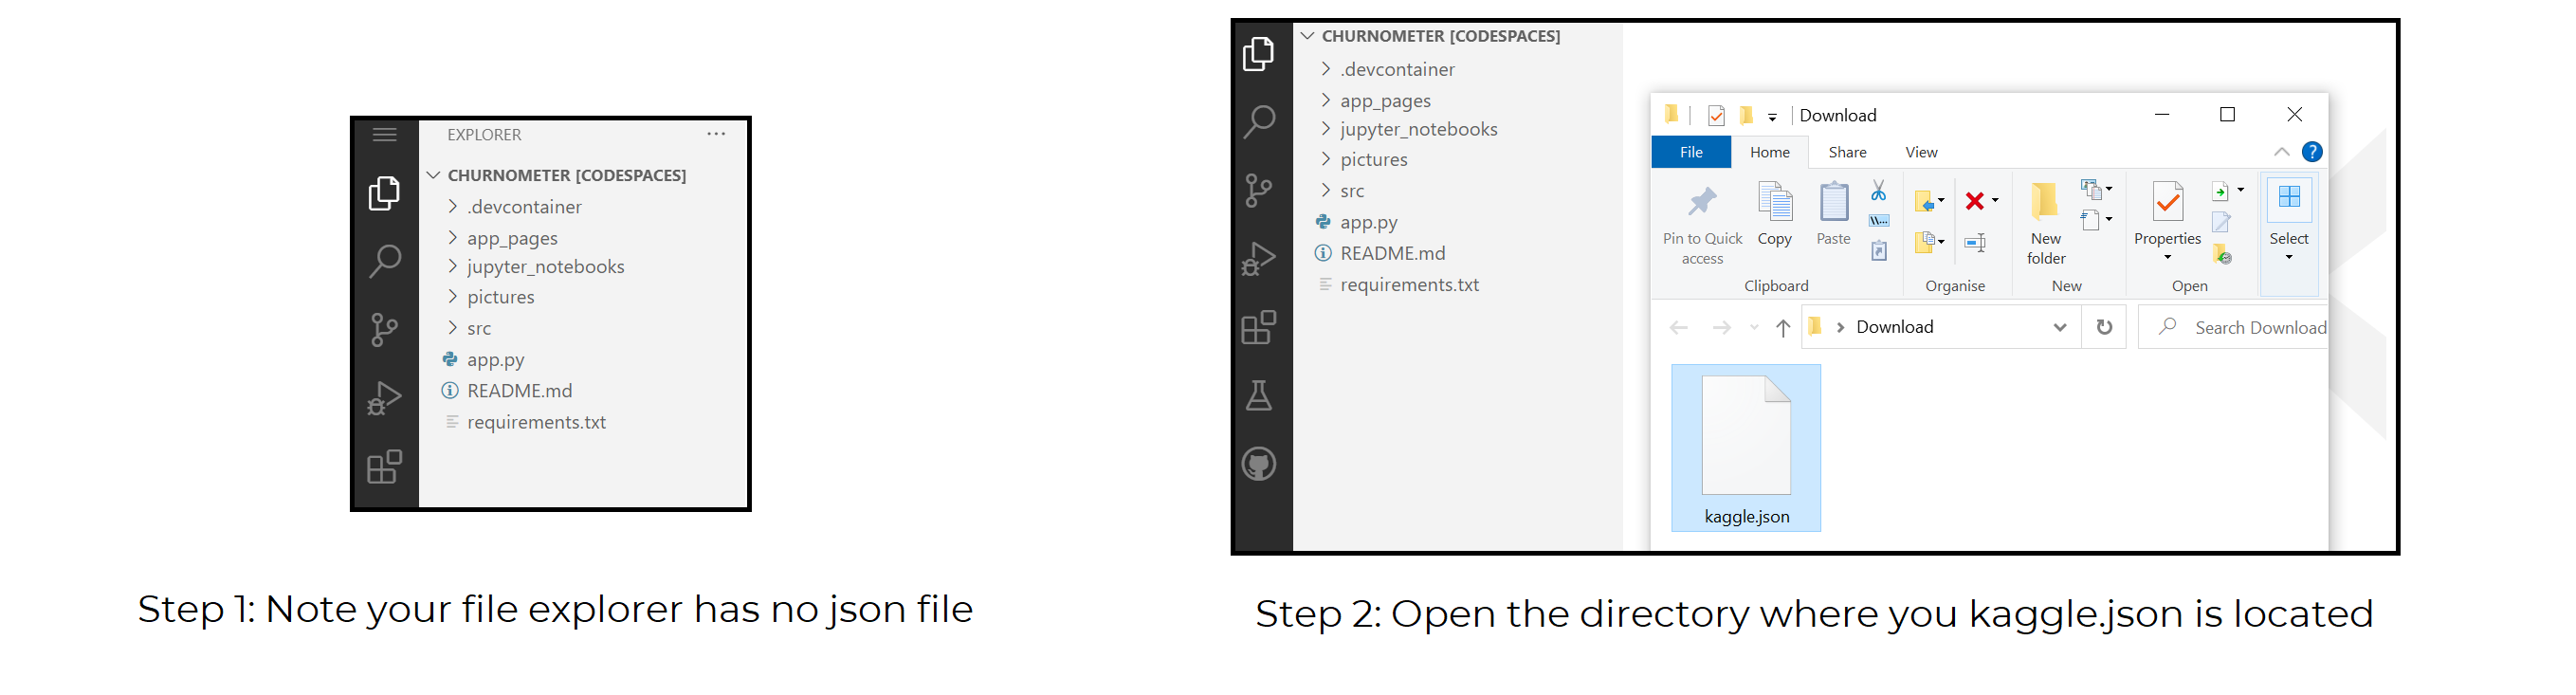

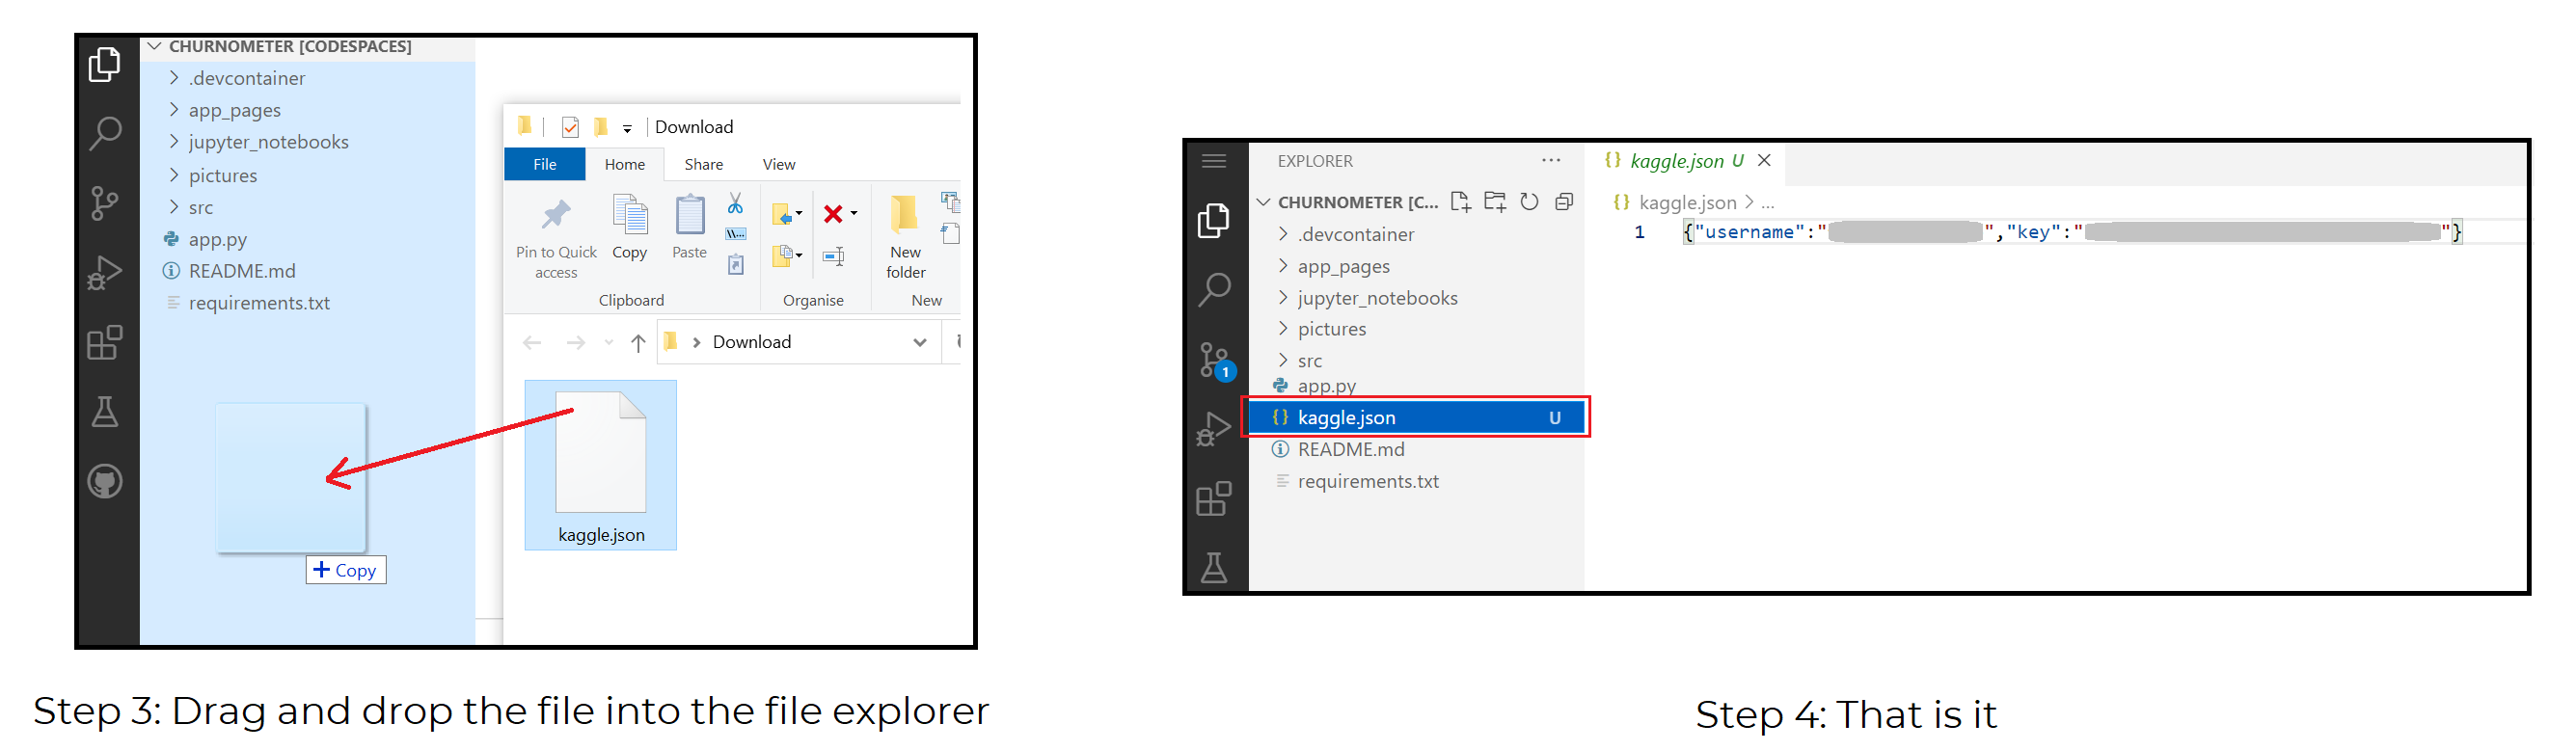

Once you do that run the cell below, so the token is recognized in the session

In [5]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = os.getcwd()
! chmod 600 kaggle.json

Get the dataset path from the Kaggle url. 
* When you are viewing the dataset at Kaggle, check what is after https://www.kaggle.com/ .

Define Kaggle dataset, destination folder and download it

In [6]:
KaggleDatasetPath = "gyanshashwat1611/telecom-churn-dataset"
DestinationFolder = "inputs/datasets/raw"   
! kaggle datasets download -d {KaggleDatasetPath} -p {DestinationFolder}

  0%|                                                | 0.00/172k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 172k/172k [00:00<00:00, 88.2MB/s]


Unzip the downloaded file, delete the zip file and delete kaggle.json file

In [7]:
! unzip {DestinationFolder}/*.zip -d {DestinationFolder} \
  && rm {DestinationFolder}/*.zip \
  && rm kaggle.json

Archive:  inputs/datasets/raw/telecom-churn-dataset.zip
  inflating: inputs/datasets/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv  


---

# Load and Inspect Kaggle data

In [8]:
import pandas as pd
df = pd.read_csv(f"inputs/datasets/raw/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


DataFrame Summary

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We want to check if there is duplicated `customerID`: There isn't

In [10]:
df[df.duplicated(subset=['customerID'])]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn


Converting `TotalCharges` to numeric

In [11]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'] ,errors='coerce')

Check `TotalCharges` data type

In [12]:
df['TotalCharges'].dtype

dtype('float64')

We noticed `Churn` is a categorical variable: Yes or No. We will replace/convert to integer

In [13]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [14]:
df['Churn'] = df['Churn'].replace({"Yes":1, "No":0})

Check `Churn` data type

In [15]:
df['Churn'].dtype

dtype('int64')

# Push files to Repo

In [ ]:
import os
try:
  os.makedirs(name='outputs/datasets/collection') # create outputs/datasets/collection folder
except Exception as e:
  print(e)

df.to_csv(f"outputs/datasets/collection/TelcoCustomerChurn.csv",index=False)

Good job! Clear cell's outputs and move on to the next notebook.

Well done! You can now push the changes to your GitHub Repo, using the Git commands (git add, git commit, git push)